In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [2]:
df = ''

In [3]:
## F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

def loaddata():
    global df
    data = input("Enter the path of your file:")
    df = pd.read_csv(data)
    df.head()
    df.tail()
    return df
    # print(df)

In [4]:
loaddata()

Enter the path of your file:health.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
#F2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)

def f2(df):
  return df.shape, df.columns, df.dtypes, df.describe

#using describe to summarise the dataset. With the result we canexamine the range of numerical values, 
#to see if there are any far outside of our expected range. 

In [6]:
f2(df)

((5110, 12),
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke'],
       dtype='object'),
 id                     int64
 gender                object
 age                  float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object,
 <bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
 0      9046    Male  67.0             0              1          Yes   
 1     51676  Female  61.0             0              0          Yes   
 2     31112    Male  80.0             0              1          Yes   
 3     60182  Female  49.0             0              0          Yes   
 4      1

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#F3: remove unnecessary/useless columns (based on results of F2 and your background knowledge and the problem to be solved), e.g., 
#identifiers, multiple primary keys, extra KPI like GMROI in sales which is the same for the whole year etc

# i have generalised the funtion by inputting the name whichever i want to drop based on the data set.

def f3(df):
  column_name = input("Enter the column you want to drop:")
  df.dropna(subset=[column_name], inplace=True)

In [9]:
f3(df)

Enter the column you want to drop:bmi


In [10]:
#to see missing values in each column
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#F4: remove rows containing a particular value of a given column, e.g., in smoking_status column, 
#I don't want to consider non-smokers in my ML problem so I remove all these rows.

#Dealing first with gender (let's see the distribution) *function should allow us to change the column names and see the distribution

def f4(df):
    column_name = input("Enter the column you want to check:")
    value_check = input("Enter the value you want to drop:")
    df.drop(df[column_name] == value_check,inplace=True)
    return df
            

In [22]:
#F5: determine the missing values in the whole dataset

def null(df):
    df.isnull()
    df.replace(' ',np.nan, inplace=True)
    df.isnull().sum()
    return df
    
    #return df.isnull().sum()

#drops all the missing values from the dataframe
#missingdf = missingdf.dropna(axis=0)

#see missing values of specific columns only
#df[df['gender'].isnull()]

In [23]:
null(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
null(df)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
#F6: analyze missing values of one or more columns using mano module

def mano_module():
    mano.bar(df)
    mano.matrix(df)
    mano.heatmap(df, figsize=(12,6))
    mano.dendrogram(df)

# visualize the location of the missingness of data using mano.matrix, bar, heatmap and dendogram


C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\HP\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2833: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


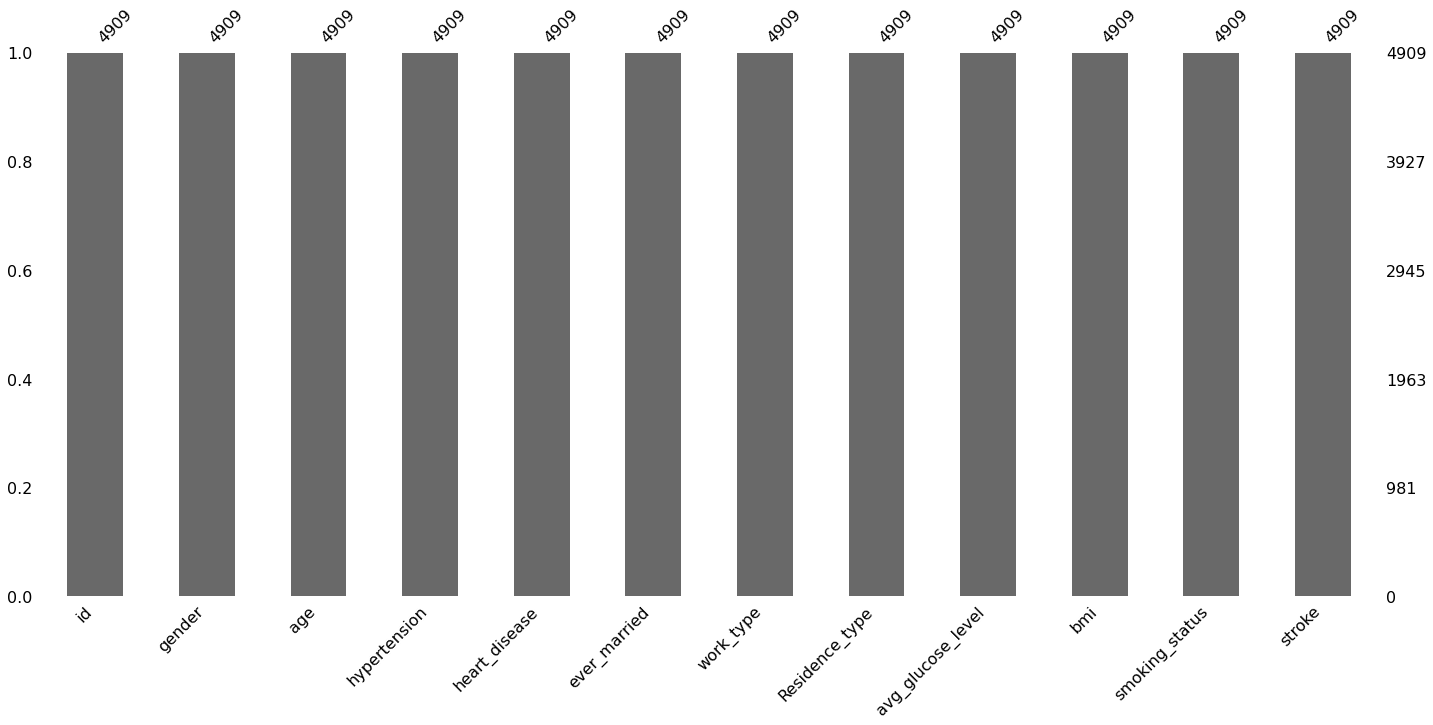

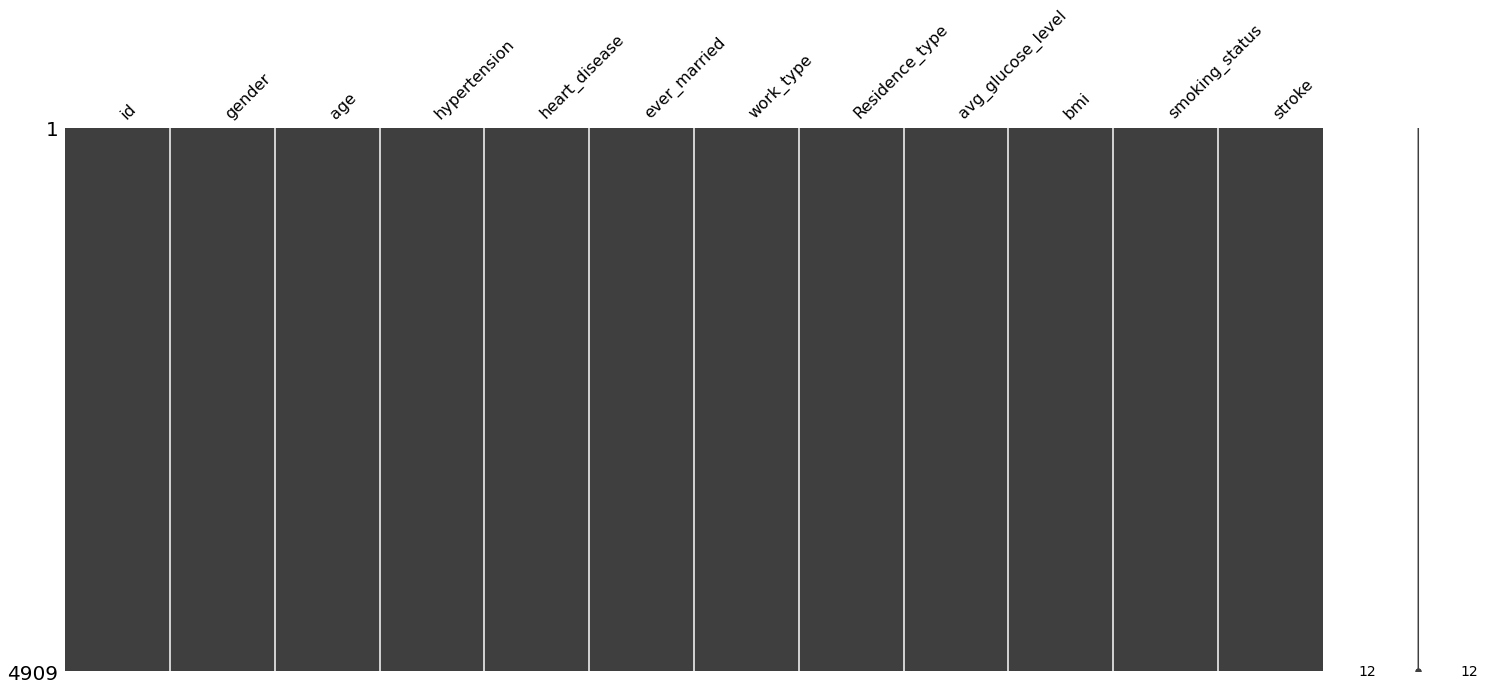

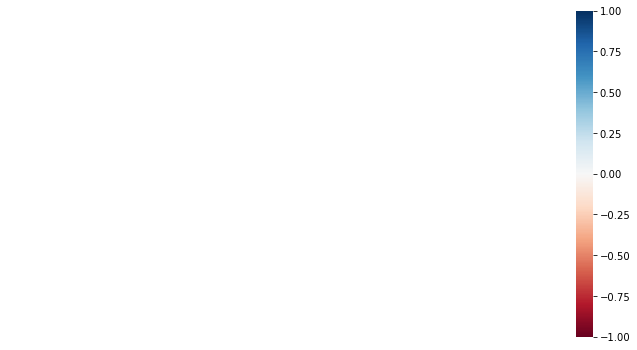

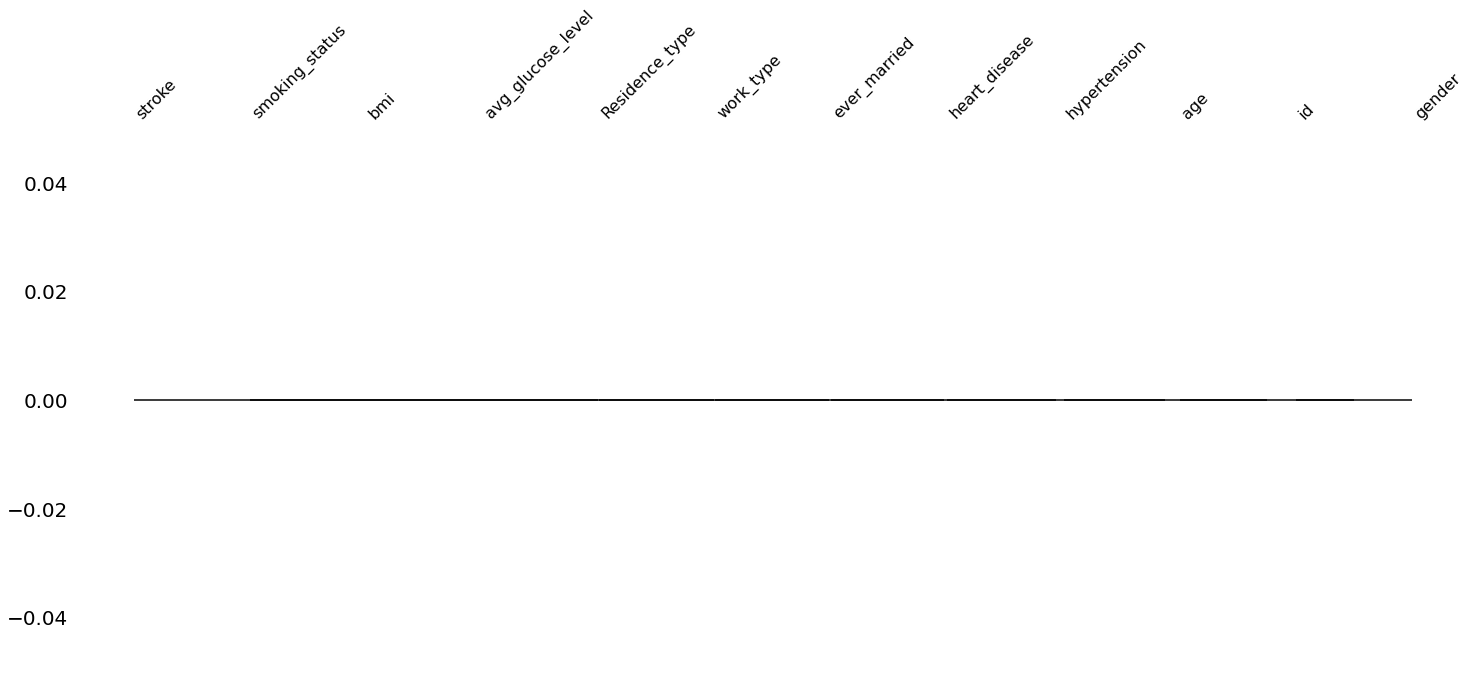

In [27]:
mano_module()

In [15]:
#F7: cater for missing values (input the column with missing value, 
#and the method through which you want to cater for the missing values)

#remove rows at specific index

df.drop(df.index[100,220] inplace=True)

#tell the number of null rown and remove null rows greater than X

------

SyntaxError: invalid syntax (<ipython-input-15-5f72a89e3223>, line 6)

In [ ]:
#F8: Function for numerical data analysis - 
#includes histogram, boxplot, qqplot, describe, and statistical tests for normality

F8: Function for numerical data analysis - includes histogram, boxplot, qqplot, describe, and statistical tests for normality
F9: Function for categorical data analysis - includes value counts, and bar charts
F10: Function to change the type of any column (input col name and the type you want)
F11: Function to change the discretizations of a particular catergorical column, e.g., rename the values, remove space between value names etc.
F12: Function for data analysis - extract year, month etc., subtract dates etc. (this function cannot be specified exactly so just add what you believe are the basic things
F13: function to make a deep copy of a dataframe
F14: function to encode categorical into numerical (label, ordinal, or onehot)
F15: function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results:
Ã‚Â - input dataframe
Ã‚Â - input the algo name (e.g., decisiontree)
Ã‚Â - input whether this is a classification task or a regression task (then you should select either decisiontreeclassifier or decisiontreeregressor within the function)
Ã‚Â - for classification, output confusion matrix, AUC, logloss and classification report
Ã‚Â - for regression, output MAE, MSE, R-squared and adjusted R-squaredÃ‚Â 
Ã‚Â - NB: you can add more metrics if available
F16: Function to apply ANOVA and output results
F17: Function to generate correlation heatmaps
F18: Function to generate scatter plot


In [ ]:
#F13: function to make a deep copy of a dataframe



In [ ]:
#F17: Function to generate correlation heatmaps



In [35]:
#F18: Function to generate scatter plot

def scatter_plot():
    column_one = input("Enter the column you want to plot:")
    column_two = input("Enter another column you want to plot:")
    return df.plot(x='column_one',y='column_two',kind='scatter',alpha=0.5,cmap='rainbow')


Enter the column you want to plot:age
Enter another column you want to plot:avg_glucose_level


KeyError: 'column_one'

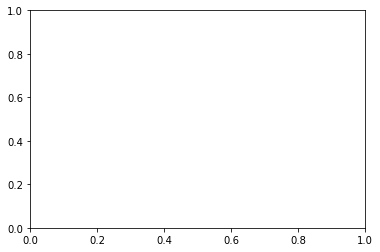

In [36]:
scatter_plot()